In [4]:
# Import the necessary Library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Traffic Accident Data Analysis Project

This project analyzes traffic accident data to identify patterns related to road conditions, weather, and time of day. Additionally, accident hotspots and contributing factors are visualized to gain actionable insights.

---

### Steps Included:
1. **Data Preparation**
2. **Time-of-Day Analysis**
3. **Weather and Road Conditions Analysis**
4. **Accident Hotspot Visualization**
5. **Insights and Conclusions**

In [5]:
# Load the dataset
df = pd.read_csv('task4.csv')
df.head()

,Accident ID,Date,Time,Road Condition,Weather,Light Condition,Severity,Latitude,Longitude,Contributing Factors
0,1,2022-01-01,06:00,Wet,Clear,Daylight,Minor,40.421433,-115.551426,Distracted Driving
1,2,2022-01-02,19:00,Dry,Clear,Daylight,Severe,40.472262,-102.378778,Weather
2,3,2022-01-03,14:00,Wet,Rainy,Night,Moderate,35.962438,-110.891336,Speeding
3,4,2022-01-04,10:00,Wet,Clear,Night,Minor,38.921826,-114.106344,Distracted Driving
4,5,2022-01-05,07:00,Dry,Clear,Daylight,Moderate,37.545441,-111.868554,Distracted Driving


In [9]:
# check the number of row and column in the dataset
df.shape

(2000, 10)

In [14]:
# find the columns 
df.columns.tolist()

['Accident ID',
 'Date',
 'Time',
 'Road Condition',
 'Weather',
 'Light Condition',
 'Severity',
 'Latitude',
 'Longitude',
 'Contributing Factors']

In [15]:
# check for null values 
df.isnull().sum()

Accident ID             0
Date                    0
Time                    0
Road Condition          0
Weather                 0
Light Condition         0
Severity                0
Latitude                0
Longitude               0
Contributing Factors    0
dtype: int64

In [20]:
# check for duplicates
df.duplicated().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Accident ID           2000 non-null   int64  
 1   Date                  2000 non-null   object 
 2   Time                  2000 non-null   object 
 3   Road Condition        2000 non-null   object 
 4   Weather               2000 non-null   object 
 5   Light Condition       2000 non-null   object 
 6   Severity              2000 non-null   object 
 7   Latitude              2000 non-null   float64
 8   Longitude             2000 non-null   float64
 9   Contributing Factors  2000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 156.4+ KB


In [22]:
df.describe()

,Accident ID,Latitude,Longitude
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,37.951845,-103.912555
std,577.494589,2.315567,8.012708
min,1.000000,34.001482,-117.996678
25%,500.750000,36.028679,-110.733969
50%,1000.500000,37.924022,-103.795530
75%,1500.250000,39.909911,-96.967735
max,2000.000000,41.997085,-90.025459


In [27]:
df.nunique()

Accident ID             2000
Date                    2000
Time                      24
Road Condition             4
Weather                    4
Light Condition            2
Severity                   4
Latitude                2000
Longitude               2000
Contributing Factors       5
dtype: int64

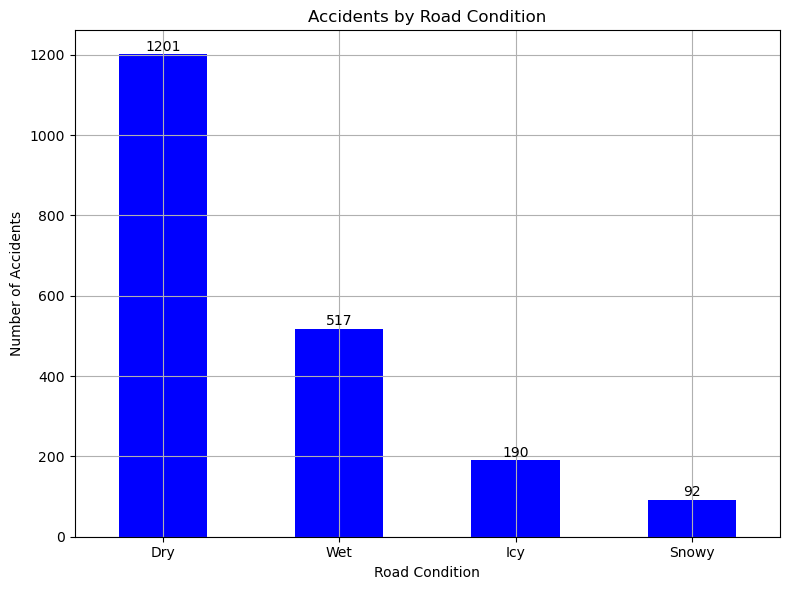

In [31]:
road_counts = df['Road Condition'].value_counts()
ax = road_counts.plot(kind='bar', title='Accidents by Road Condition', color='blue', figsize=(8, 6))

# Add labels on top of each bar
for i, value in enumerate(road_counts):
    ax.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=10)

# Add labels and display the plot
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


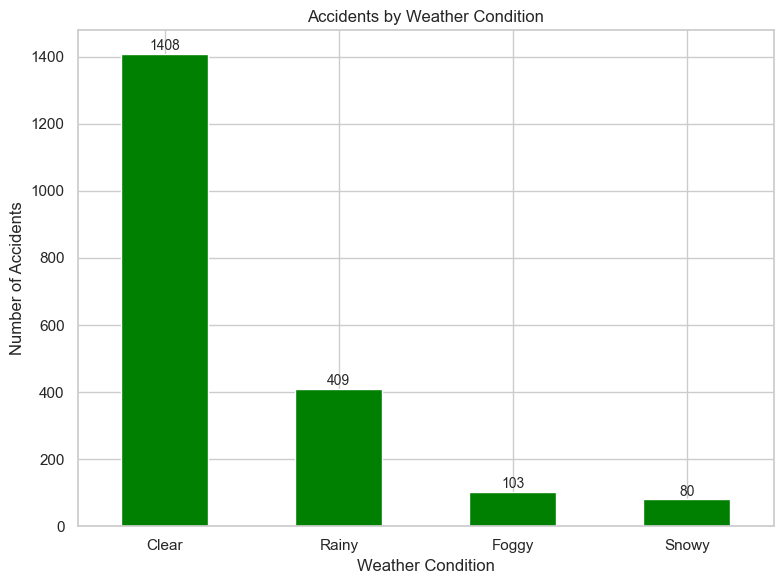

In [17]:
we_counts = df['Weather'].value_counts()
ax = we_counts.plot(kind='bar', title='Accidents by Weather Condition', color='green', figsize=(8, 6))

# Add labels on top of each bar
for i, value in enumerate(we_counts):
    ax.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=10)

# Add labels and display the plot
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

- **Road Features Impacting Accidents:**
  - **Intersections and Traffic Signals:** Intersections, particularly with traffic signals or stop signs, contribute to a higher number of accidents. Sudden stops, turns, or the failure to notice traffic signals might lead to collisions, especially in congested areas.
  - **Road Types and Features:** While roundabouts and other road features such as bends or forks exist, their contribution to accidents is generally lower compared to intersections with traffic signals or stop signs. These features might help traffic flow more smoothly but still present risks if not designed or used properly.
  - **Road Surface Conditions:** Wet or slippery roads during rain or snow can cause drivers to lose control, increasing accident risks. Similarly, road defects like potholes can contribute to accidents.

In [14]:

# Create a map centered at the mean latitude and longitude
accident_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

# Add a heatmap layer
HeatMap(data=df[['Latitude', 'Longitude']].values.tolist()).add_to(accident_map)
# To display in a Jupyter Notebook (optional)
accident_map


### Insights from Accident Hotspot Visualization:
- **High-Density Areas:** The heatmap generated from accident data reveals regions with significant concentrations of accidents. These areas are often located near major intersections, highways, and urban zones. The color intensity on the map reflects these high-density accident areas.
  
- **Potential Risk Zones:** By visualizing accident hotspots, we can identify specific locations that may require targeted road safety measures. These could include improved signage, better lighting, optimized traffic signals, or even physical interventions like road widening or enhanced pedestrian crossings.

- **Interactive Exploration:** The heatmap is interactive, allowing you to zoom in, zoom out, and click on various locations to explore accident hotspots in greater detail. The map is generated dynamically and displayed directly in the notebook, making it easy to analyze accident concentrations and assess areas needing attention without having to open an external HTML file.

### Conclusion:
- **Targeted Safety Measures:** The heatmap helps visualize areas where accidents are frequent, enabling local authorities or city planners to focus on interventions such as traffic management and road safety enhancements.
  
- **Time-Sensitive Action:** Given the interactive nature of the heatmap, it is possible to explore specific accident patterns over time, considering factors like peak hours or accident frequency by day of the week, which may further aid in decision-making for safety improvements.

- **Data-Driven Decisions:** This method of visualizing accident data provides a data-driven approach to urban planning and public safety. Understanding accident hotspots allows for more informed, localized, and timely safety strategies to be implemented.


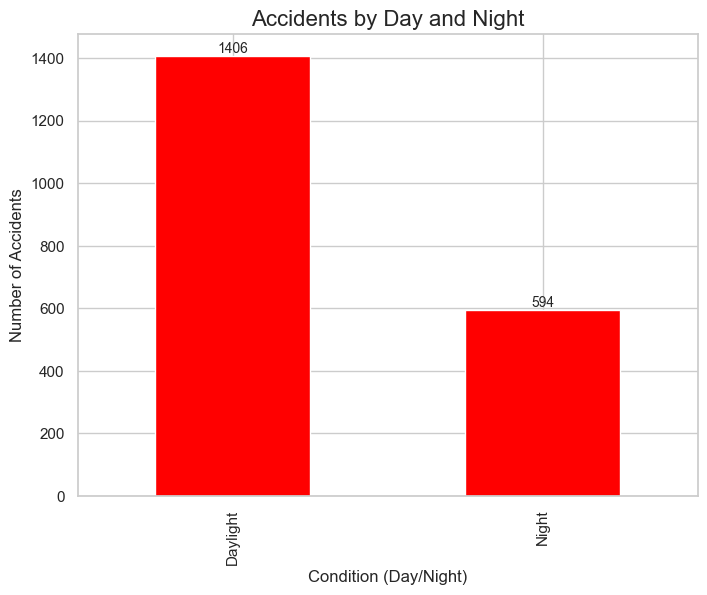

In [15]:
# Twilight conditions analysis
ac_counts = df['Light Condition'].value_counts()
ax = ac_counts.plot(kind='bar', title='Accidents by Light Condition', color='red', figsize=(8, 6))

# Add labels on top of each bar
for i, value in enumerate(ac_counts):
    ax.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=10)
plt.title('Accidents by Day and Night', fontsize=16)
plt.xlabel('Condition (Day/Night)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.show()


### Insights from Weather and Road Conditions Analysis:

- **Twilight and Nighttime Conditions:**
  - **Higher Accident Rates During Twilight and Night:** A noticeable increase in accidents occurs during **nighttime** and **daylight** periods when visibility is reduced. These times often pose challenges for drivers due to lower natural light levels.
  - **Reduced Visibility:** Poor lighting and visibility during nighttime periods contribute significantly to higher accident rates. Drivers may have more difficulty seeing obstacles, road signs, and other vehicles.

### Conclusion:

- **Visibility and Lighting Issues:** Accidents tend to increase in areas with poor visibility, particularly during **nighttime** and **twilight** conditions. Improved street lighting, road signs, and reflective markings could help reduce accidents during these hours.
  
- **High-Risk Intersections:** Intersections with traffic signals, stop signs, or high congestion should be a focus for road safety initiatives. Possible interventions include better traffic signal timing, clearer signage, or the installation of traffic cameras to monitor and enforce safe driving behaviors.

- **Weather-Related Accidents:** Weather conditions, particularly rain, snow, and fog, play a significant role in accidents. Enhanced road maintenance during adverse weather and public education campaigns on safe driving in these conditions could help reduce accident rates.
